In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
train_X=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/preprocessed_X_train.csv')
train_y=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/y_train.csv')
test_X=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/preprocessed_X_test.csv')
test_y=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/y_test.csv')

In [3]:
scaler=StandardScaler()
train_X_scaled=scaler.fit_transform(train_X)
test_X_scaled=scaler.transform(test_X)

In [5]:
# 3. GridSearchCV를 사용한 하이퍼파라미터 튜닝
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1: Manhattan distance, p=2: Euclidean distance
}

In [6]:
grid_search = GridSearchCV(estimator=KNeighborsRegressor(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

In [7]:
grid_search.fit(train_X_scaled, train_y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [8]:
# 최적의 하이퍼파라미터를 사용한 모델

best_knn = grid_search.best_estimator_

In [9]:
# 4. 모델 학습
best_knn.fit(train_X_scaled, train_y)

KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')

In [10]:
# 모델 평가 (RMSE)

predictions=best_knn.predict(test_X_scaled)
rmse=np.sqrt(mean_squared_error(test_y,predictions))

In [11]:
rmse

1.7141934919891482

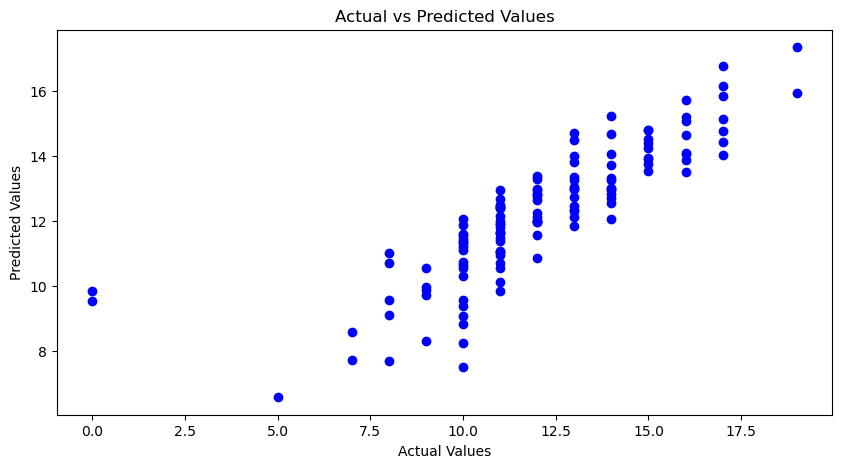

In [12]:
# 결과를 시각화합니다.
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.scatter(test_y, predictions, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()